In [59]:
%matplotlib inline
import numpy as np
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120

In [60]:
#auth here with your own auth
auth = tweepy.OAuthHandler('', '')
auth.set_access_token('', '')
api = tweepy.API(auth)

In [61]:
QUERY = 'TensorFlow'

results = api.search(q=QUERY)


In [62]:
len(results)

14

In [63]:
def print_tweet(tweet):
    print("@%s - %s (%s)" % (tweet.user.screen_name, tweet.user.name, tweet.created_at))
    print(tweet.text)

tweet=results[1]
print_tweet(tweet)

@AiHellos - AiHello (2017-08-16 23:00:16)
RT @analyticbridge: #DeepLearning with #TensorFlow in Python: Convolution Neural Nets #abdsc https://t.co/YJKuJsX3JF https://t.co/uuvvNbXPzF


In [64]:
tweet=results[2]

for param in dir(tweet):
    if not param.startswith("_"):
        print("%s : %s" % (param, eval("tweet." + param)))

author : User(_api=<tweepy.api.API object at 0x000000FC73233CC0>, _json={'id': 257842996, 'id_str': '257842996', 'name': 'Saurabh Chaturvedi', 'screen_name': 'arichduvet', 'location': 'Hidden in Plain Sight', 'description': 'Natural intelligence learning artificial intelligence. Tweets from natural intelligence are signed -sc.', 'url': 'https://t.co/BXOaphXt5L', 'entities': {'url': {'urls': [{'url': 'https://t.co/BXOaphXt5L', 'expanded_url': 'https://www.github.com/schedutron', 'display_url': 'github.com/schedutron', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 4130, 'friends_count': 4325, 'listed_count': 403, 'created_at': 'Sat Feb 26 09:25:02 +0000 2011', 'favourites_count': 74557, 'utc_offset': 19800, 'time_zone': 'New Delhi', 'geo_enabled': False, 'verified': False, 'statuses_count': 86827, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '0099B9', 'profil

In [65]:
user=tweet.author

for param in dir(user):
    if not param.startswith("_"):
        print("%s : %s" % (param, eval("user." + param)))

contributors_enabled : False
created_at : 2011-02-26 09:25:02
default_profile : False
default_profile_image : False
description : Natural intelligence learning artificial intelligence. Tweets from natural intelligence are signed -sc.
entities : {'url': {'urls': [{'url': 'https://t.co/BXOaphXt5L', 'expanded_url': 'https://www.github.com/schedutron', 'display_url': 'github.com/schedutron', 'indices': [0, 23]}]}, 'description': {'urls': []}}
favourites_count : 74557
follow : <bound method User.follow of User(_api=<tweepy.api.API object at 0x000000FC73233CC0>, _json={'id': 257842996, 'id_str': '257842996', 'name': 'Saurabh Chaturvedi', 'screen_name': 'arichduvet', 'location': 'Hidden in Plain Sight', 'description': 'Natural intelligence learning artificial intelligence. Tweets from natural intelligence are signed -sc.', 'url': 'https://t.co/BXOaphXt5L', 'entities': {'url': {'urls': [{'url': 'https://t.co/BXOaphXt5L', 'expanded_url': 'https://www.github.com/schedutron', 'display_url': 'gith

In [66]:
results = []
for tweet in tweepy.Cursor(api.search, q="IPython").items(100):
    results.append(tweet)

print(len(results))

100


In [67]:
def process_results(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list, columns=["id"])

    # Processing Tweet Data

    data_set["text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
    data_set["favorite_count"] = [tweet.favorite_count for tweet in results]
    data_set["source"] = [tweet.source for tweet in results]

    # Processing User Data
    data_set["user_id"] = [tweet.author.id for tweet in results]
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    data_set["user_name"] = [tweet.author.name for tweet in results]
    data_set["user_created_at"] = [tweet.author.created_at for tweet in results]
    data_set["user_description"] = [tweet.author.description for tweet in results]
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    data_set["user_friends_count"] = [tweet.author.friends_count for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]

    return data_set
data_set = process_results(results)

In [68]:
data_set.head(5)

,id,text,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location
0,897956355448774656,Broke ipython notebook code highlighting and f...,2017-08-16 23:00:53,0,0,TweetDeck,18616963,hunter_owens,Hunter Owens,2009-01-05 00:00:01,Public Servant/Data Scientist @ the City of Lo...,1252,1159,LA
1,897843142111543300,Be sure to check out our FCS Power Rankings wa...,2017-08-16 15:31:00,1,6,TweetDeck,778631837287583744,YaleSportsGroup,Yale Sport Analytics,2016-09-21 16:27:51,Official Twitter for the Yale Undergraduate Sp...,1118,219,"New Haven, CT"
2,897834101830504448,RT @jtemplon: This is a really clear and well ...,2017-08-16 14:55:05,1,0,Twitter for iPhone,778631837287583744,YaleSportsGroup,Yale Sport Analytics,2016-09-21 16:27:51,Official Twitter for the Yale Undergraduate Sp...,1118,219,"New Haven, CT"
3,897833607242362880,This is a really clear and well laid out iPyth...,2017-08-16 14:53:07,1,4,Twitter Web Client,17969877,jtemplon,John Templon,2008-12-08 19:12:01,Data Reporter for BuzzFeed News. Send me tips ...,1791,649,"New York, NY"
4,897828044047384576,Check out the methodology for our newly releas...,2017-08-16 14:31:01,1,7,TweetDeck,778631837287583744,YaleSportsGroup,Yale Sport Analytics,2016-09-21 16:27:51,Official Twitter for the Yale Undergraduate Sp...,1118,219,"New Haven, CT"


In [69]:
data_set.tail(5)


,id,text,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location
95,895883503597895680,Jupyter (IPython notebook) が言語非依存になってまだそんなに経って...,2017-08-11 05:44:06,0,3,Twitter Web Client,12904902,methane,INADA Naoki,2008-01-31 11:38:58,"Python, Go",3124,588,Kanagawa
96,895857308844019713,Are there any forks of Jupyter/Ipython that fu...,2017-08-11 04:00:01,0,1,post_from_reddit,1849184514,RedditPython,/r/Python Popular,2013-09-09 19:37:37,,545,219,
97,895837488966586368,"If you have been using pdb, consider upgrading...",2017-08-11 02:41:15,0,2,Twitter for Mac,267831041,sandeeprajup,Sandeep Raju,2011-03-17 16:34:07,"Engineer @salesforce, MS in CS @NorthwesternU,...",424,151,"Silicon Valley, CA"
98,895834663456997377,widgetsnbextension 3.0.0b11: IPython HTML widg...,2017-08-11 02:30:02,0,0,pypi_updates2,739422728168476673,pypi_updates2,PyPI Recent Updates,2016-06-05 11:44:51,Unofficial bot to flow PyPI recent updates.,369,0,
99,895834661578047489,ipywidgets 7.0.0b11: IPython HTML widgets for ...,2017-08-11 02:30:01,0,0,pypi_updates2,739422728168476673,pypi_updates2,PyPI Recent Updates,2016-06-05 11:44:51,Unofficial bot to flow PyPI recent updates.,369,0,


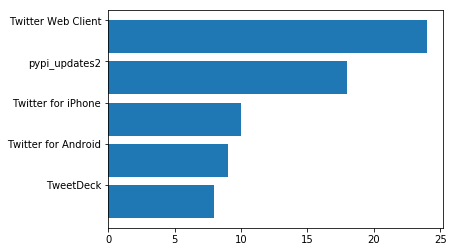

In [78]:

sources = data_set["source"].value_counts()[:5][::-1]

plt.barh(range(len(sources)), sources.values)
plt.yticks(np.arange(len(sources)) + 0.4, sources.index)
plt.show()

SyntaxError: unexpected EOF while parsing (<ipython-input-75-4137e236d887>, line 1)